### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score, get_scorer_names

In [3]:
#setting plots' background
sns.set_style("whitegrid")

### Reading file

In [4]:
df = pd.read_csv('data/exams.csv')


### EDA

In [5]:
df.shape

(1000, 8)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Zmiana nazw kolumn

In [9]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('/','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [11]:
numerical_columns = df.select_dtypes(include=['int']).columns.tolist()
numerical_columns

['math_score', 'reading_score', 'writing_score']

In [12]:
for col in categorical_columns:
    print(df[col].value_counts(), '\n')

male      517
female    483
Name: gender, dtype: int64 

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64 

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental_level_of_education, dtype: int64 

standard        652
free/reduced    348
Name: lunch, dtype: int64 

none         665
completed    335
Name: test_preparation_course, dtype: int64 



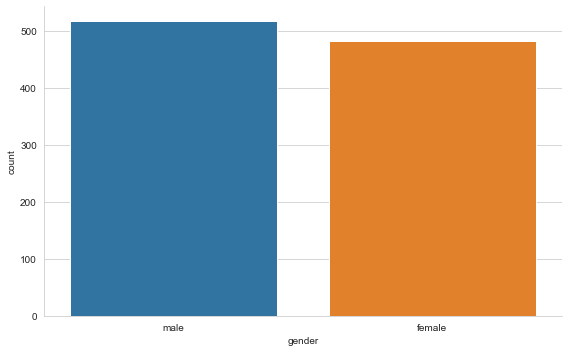

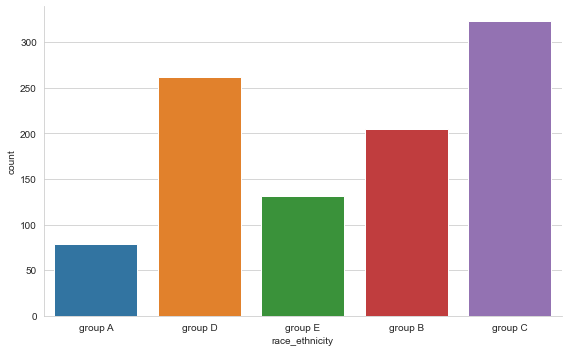

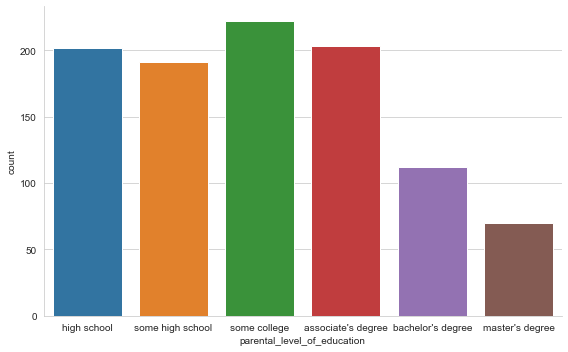

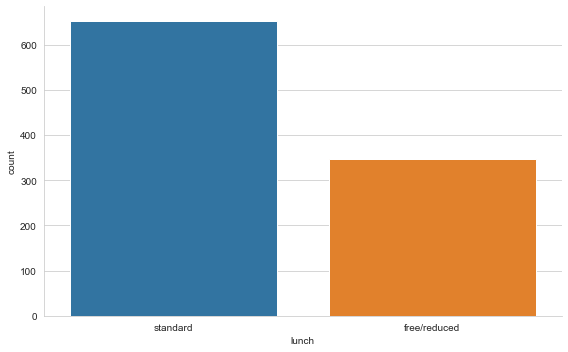

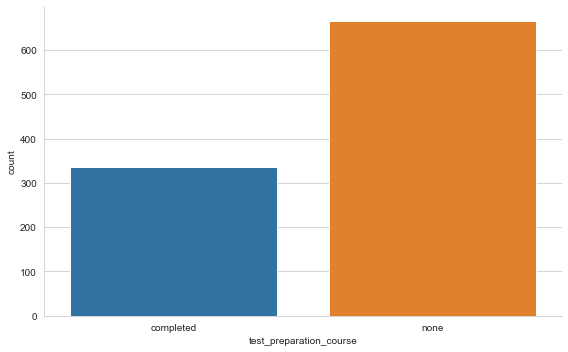

In [13]:
for col in categorical_columns:
    sns.catplot(data = df, x = col, kind = 'count', height=5, aspect=1.6);

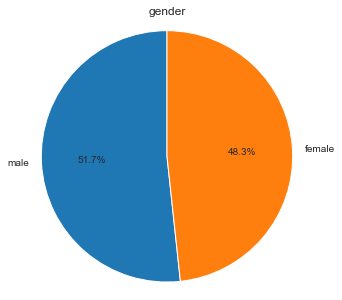

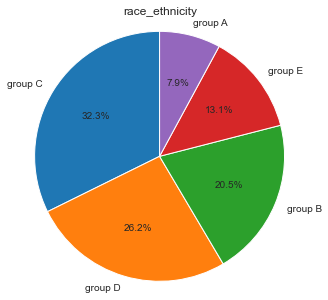

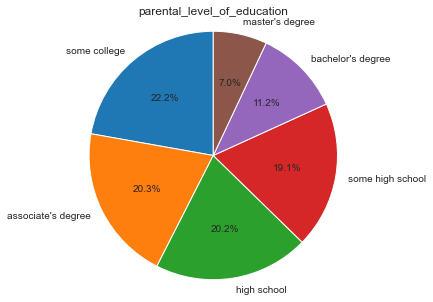

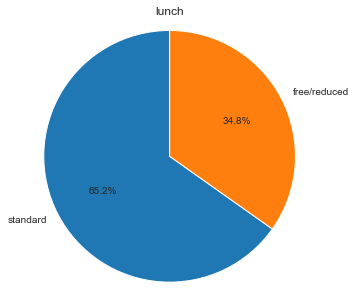

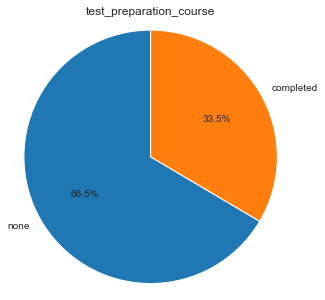

In [14]:
for cat_col in categorical_columns:
    labels = df[cat_col].value_counts().index
    sizes = df[cat_col].value_counts()

    fig1, ax1 = plt.subplots(figsize=(5,5))
    fig1
    title = plt.title(cat_col);
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

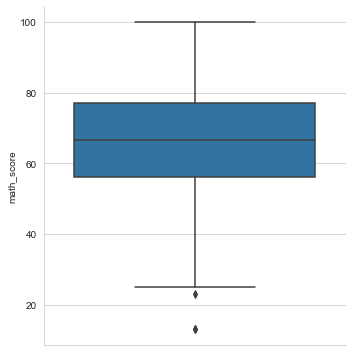

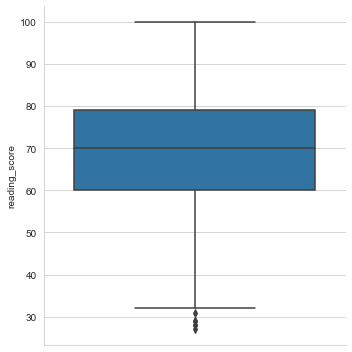

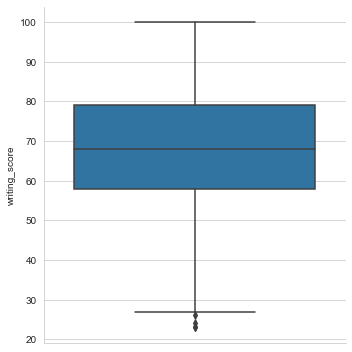

In [15]:
for num_col in numerical_columns:
    sns.catplot(data=df, y=num_col, kind='box');

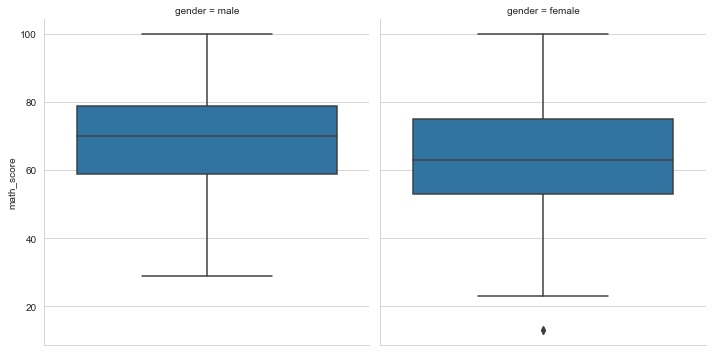

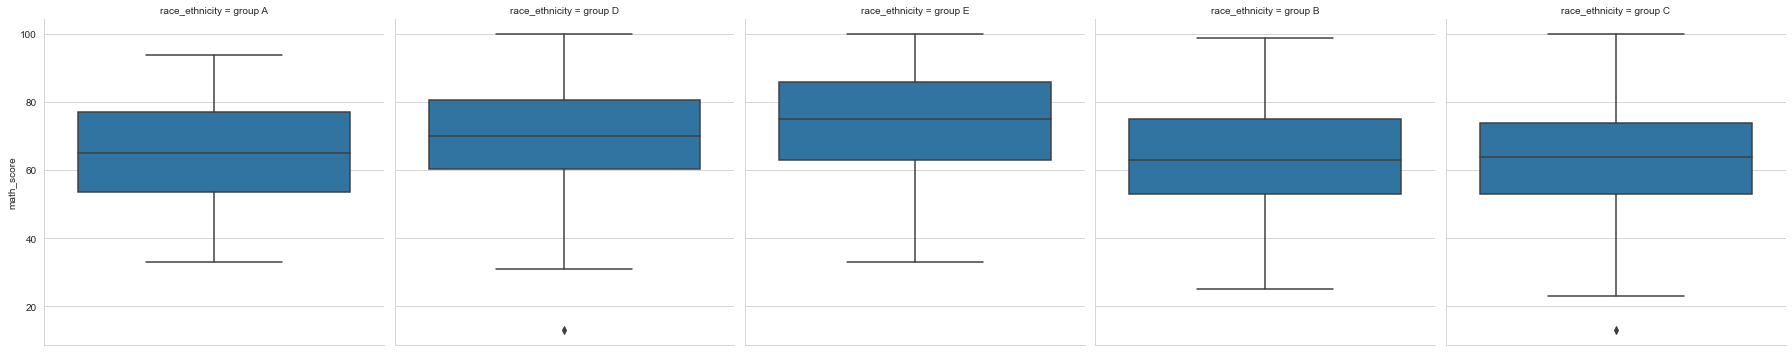

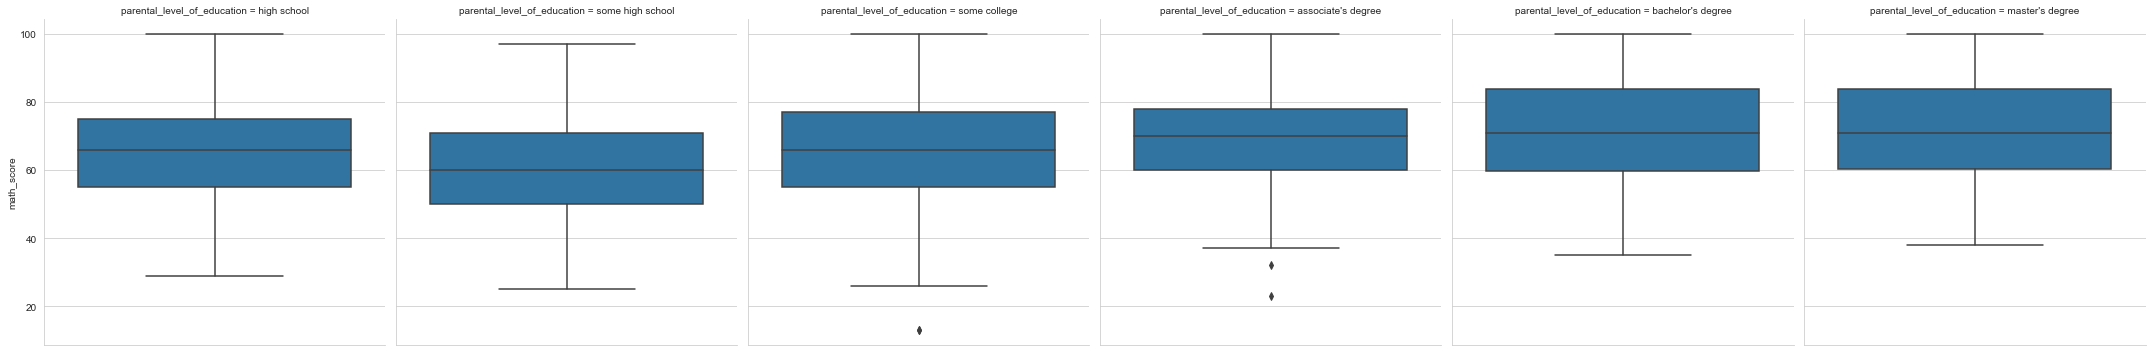

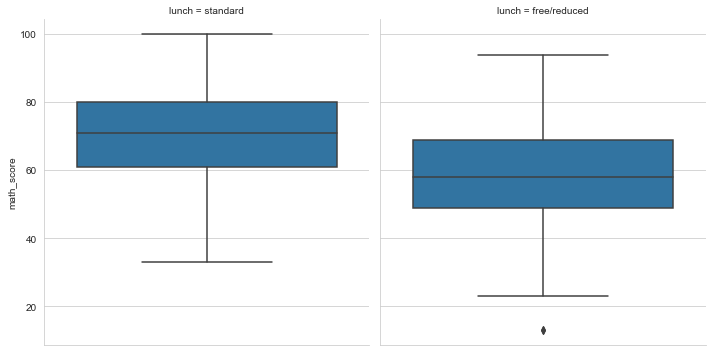

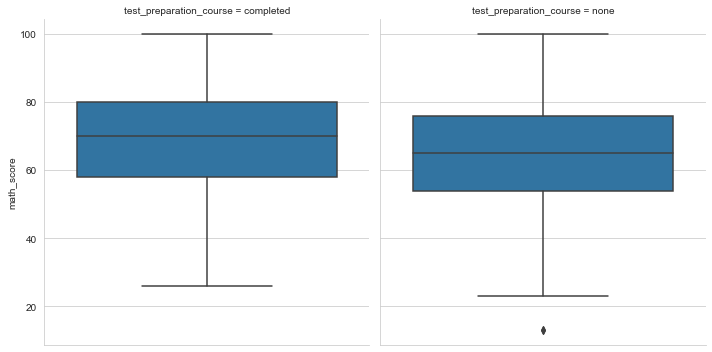

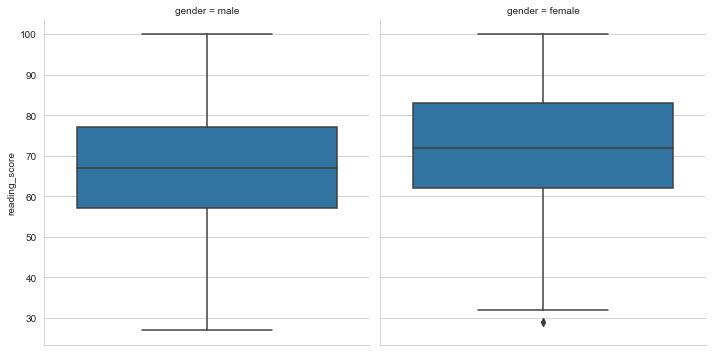

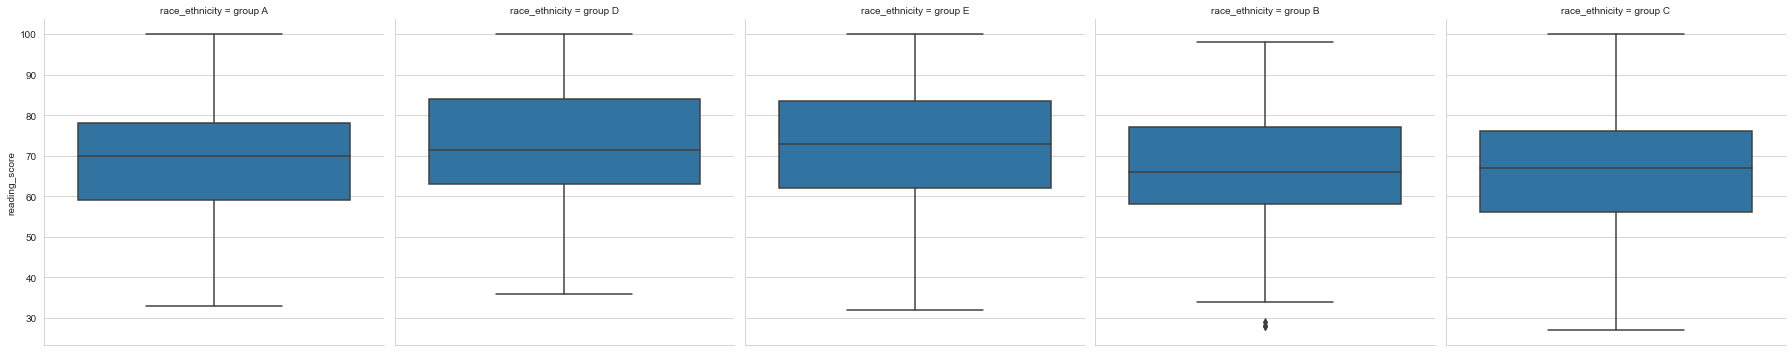

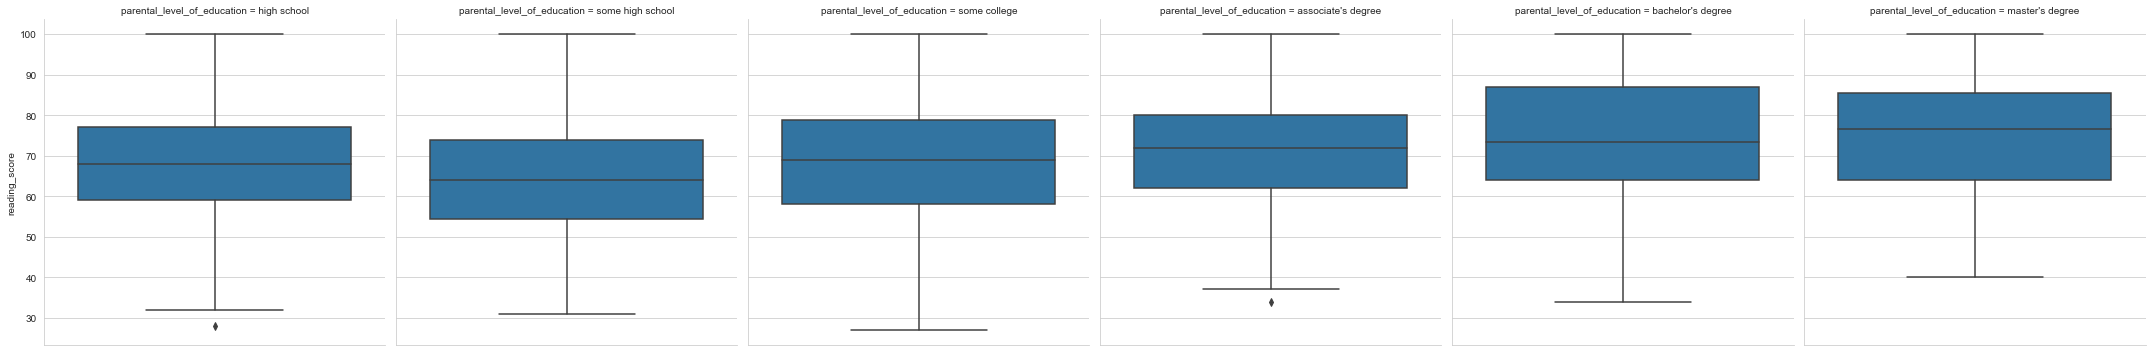

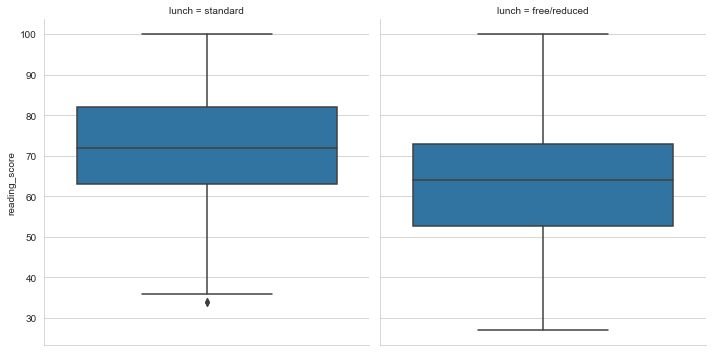

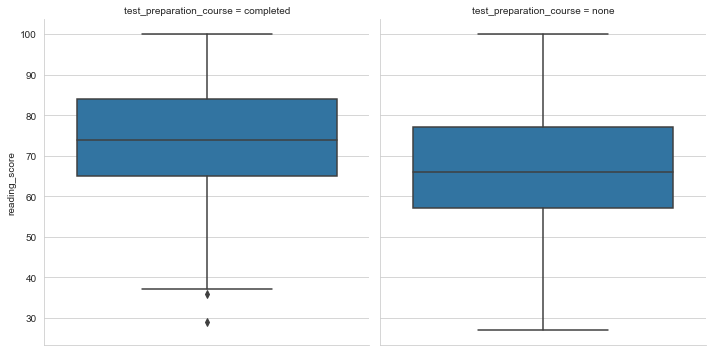

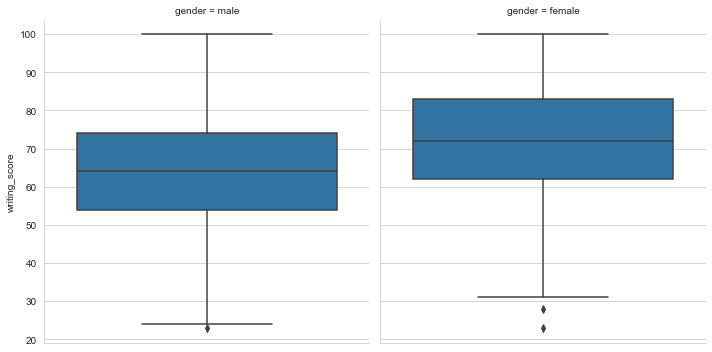

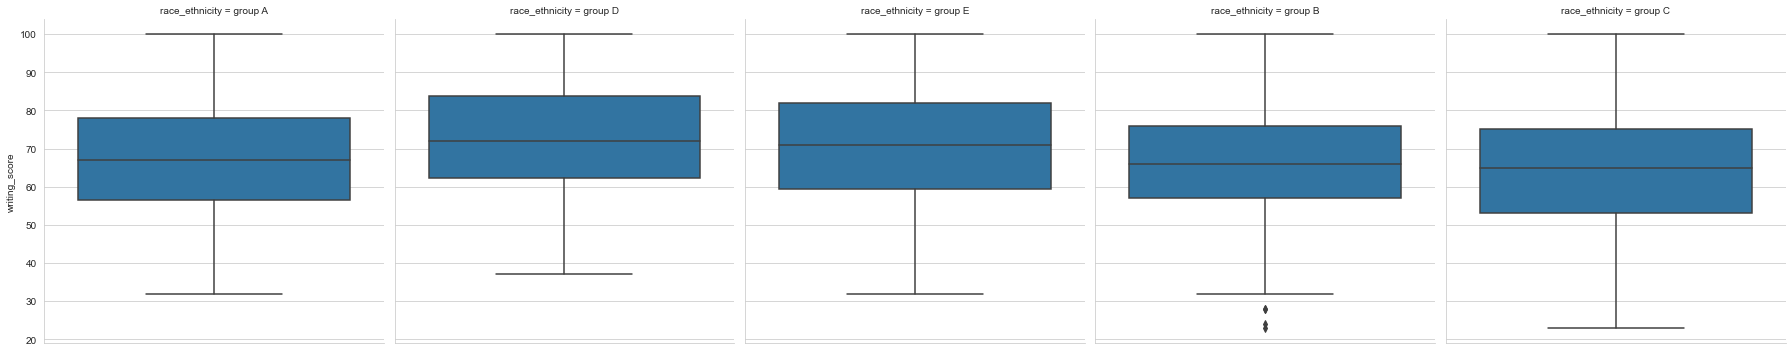

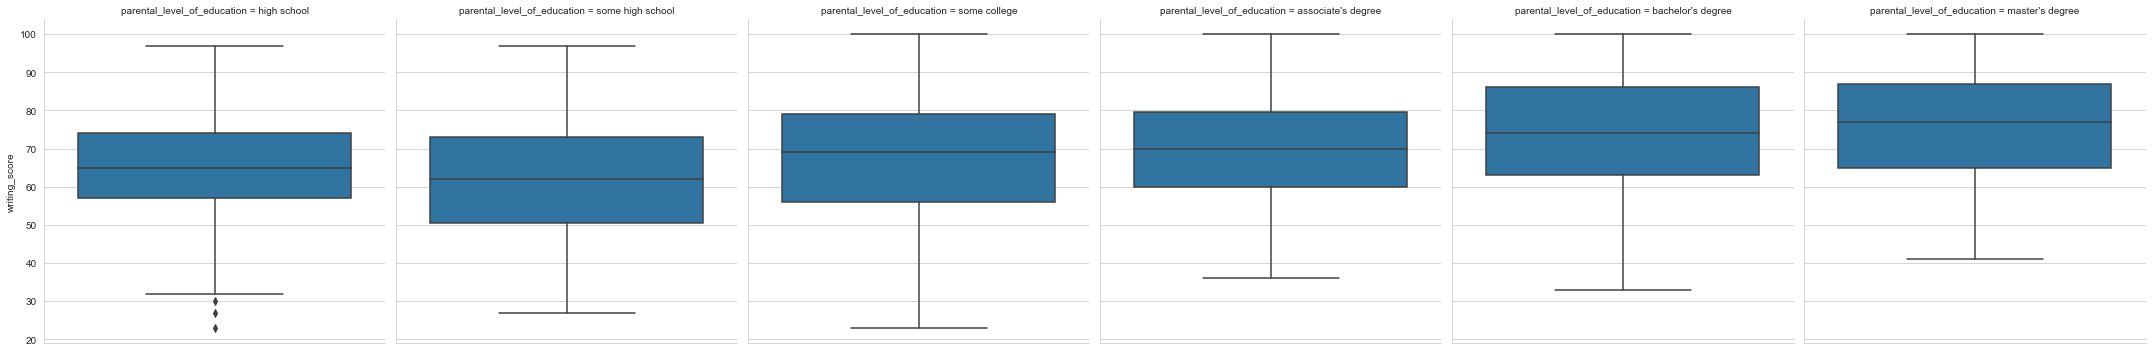

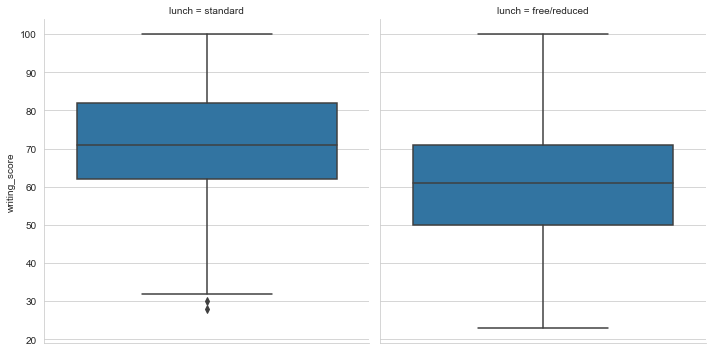

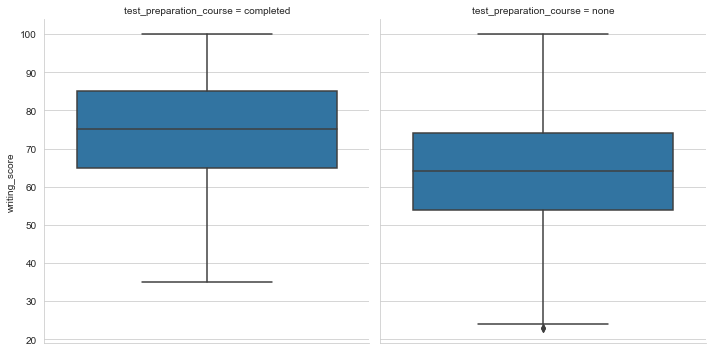

In [16]:
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        sns.catplot(data=df, y=num_col, col = cat_col, kind='box',height=5);

**Conclusion:** All variables impact tests' scores.

In [17]:
def histogram(df: pd.DataFrame, col_list: list, n_bin: int = 6):
    for col in col_list:
        plt.figure(figsize = (6,5))
        plt.hist(df[col], bins = n_bin)
        plt.title(col)

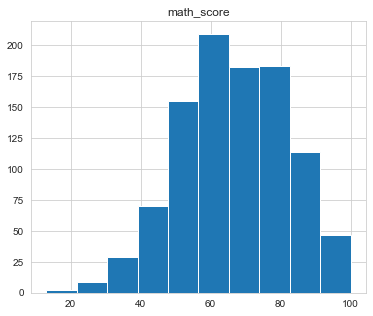

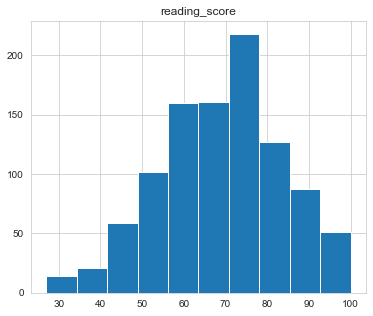

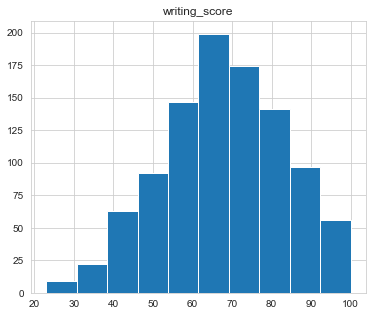

In [18]:
histogram(df, numerical_columns, n_bin= 10)

##### Checkpoint

In [19]:
df2 = df.copy()

##### One Hot Encoding

In [20]:
df2 = pd.get_dummies(df, columns=categorical_columns)
df2.head()

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,67,67,63,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,40,59,55,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,59,60,50,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,77,78,68,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,78,73,68,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0


##### Renaming columns

In [21]:

df2.columns = df2.columns.str.replace(' ','_')
df2.columns = df2.columns.str.replace('/','_')
df2.columns = df2.columns.str.replace('\'','')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math_score                                     1000 non-null   int64
 1   reading_score                                  1000 non-null   int64
 2   writing_score                                  1000 non-null   int64
 3   gender_female                                  1000 non-null   uint8
 4   gender_male                                    1000 non-null   uint8
 5   race_ethnicity_group_A                         1000 non-null   uint8
 6   race_ethnicity_group_B                         1000 non-null   uint8
 7   race_ethnicity_group_C                         1000 non-null   uint8
 8   race_ethnicity_group_D                         1000 non-null   uint8
 9   race_ethnicity_group_E                         1000 non-null   uint8
 10  p

In [22]:

df2.corr(method='spearman')

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group_A,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E,parental_level_of_education_associates_degree,parental_level_of_education_bachelors_degree,parental_level_of_education_high_school,parental_level_of_education_masters_degree,parental_level_of_education_some_college,parental_level_of_education_some_high_school,lunch_free_reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
math_score,1.000000,0.814258,0.798316,-0.193047,0.193047,-0.023776,-0.110060,-0.141661,0.118324,0.192825,0.100685,0.108103,-0.039365,0.090441,-0.030072,-0.176459,-0.363140,0.363140,0.145819,-0.145819
reading_score,0.814258,1.000000,0.950767,0.181827,-0.181827,-0.002531,-0.062969,-0.123938,0.121751,0.090464,0.063285,0.118116,-0.053636,0.109558,-0.024637,-0.149800,-0.273246,0.273246,0.244122,-0.244122
writing_score,0.798316,0.950767,1.000000,0.240425,-0.240425,-0.012614,-0.060662,-0.139161,0.165223,0.060208,0.071983,0.146431,-0.091265,0.132708,-0.020359,-0.162533,-0.308331,0.308331,0.312719,-0.312719
gender_female,-0.193047,0.181827,0.240425,1.000000,-1.000000,-0.008584,0.074281,-0.008597,-0.002485,-0.066861,-0.084821,0.024773,-0.017774,0.064235,-0.034795,0.080166,-0.033962,0.033962,-0.007653,0.007653
gender_male,0.193047,-0.181827,-0.240425,-1.000000,1.000000,0.008584,-0.074281,0.008597,0.002485,0.066861,0.084821,-0.024773,0.017774,-0.064235,0.034795,-0.080166,0.033962,-0.033962,0.007653,-0.007653
race_ethnicity_group_A,-0.023776,-0.002531,-0.012614,-0.008584,0.008584,1.000000,-0.148723,-0.202298,-0.174504,-0.113713,-0.046425,0.060564,-0.008846,0.035889,0.021962,-0.038564,-0.011612,0.011612,0.043475,-0.043475
race_ethnicity_group_B,-0.110060,-0.062969,-0.060662,0.074281,-0.074281,-0.148723,1.000000,-0.350752,-0.302563,-0.197160,-0.009946,-0.023250,-0.014869,0.045144,0.020802,-0.007278,-0.006968,0.006968,0.017450,-0.017450
race_ethnicity_group_C,-0.141661,-0.123938,-0.139161,-0.008597,0.008597,-0.202298,-0.350752,1.000000,-0.411556,-0.268184,0.050140,-0.007974,-0.038595,-0.021875,-0.013924,0.023431,0.011655,-0.011655,-0.028113,0.028113
race_ethnicity_group_D,0.118324,0.121751,0.165223,-0.002485,0.002485,-0.174504,-0.302563,-0.411556,1.000000,-0.231339,-0.018013,-0.002481,0.034416,-0.020857,-0.006370,0.005542,-0.062906,0.062906,-0.018165,0.018165
race_ethnicity_group_E,0.192825,0.090464,0.060208,-0.066861,0.066861,-0.113713,-0.197160,-0.268184,-0.231339,1.000000,0.002999,-0.006316,0.033500,-0.025207,-0.014848,-0.000158,0.083452,-0.083452,0.007002,-0.007002


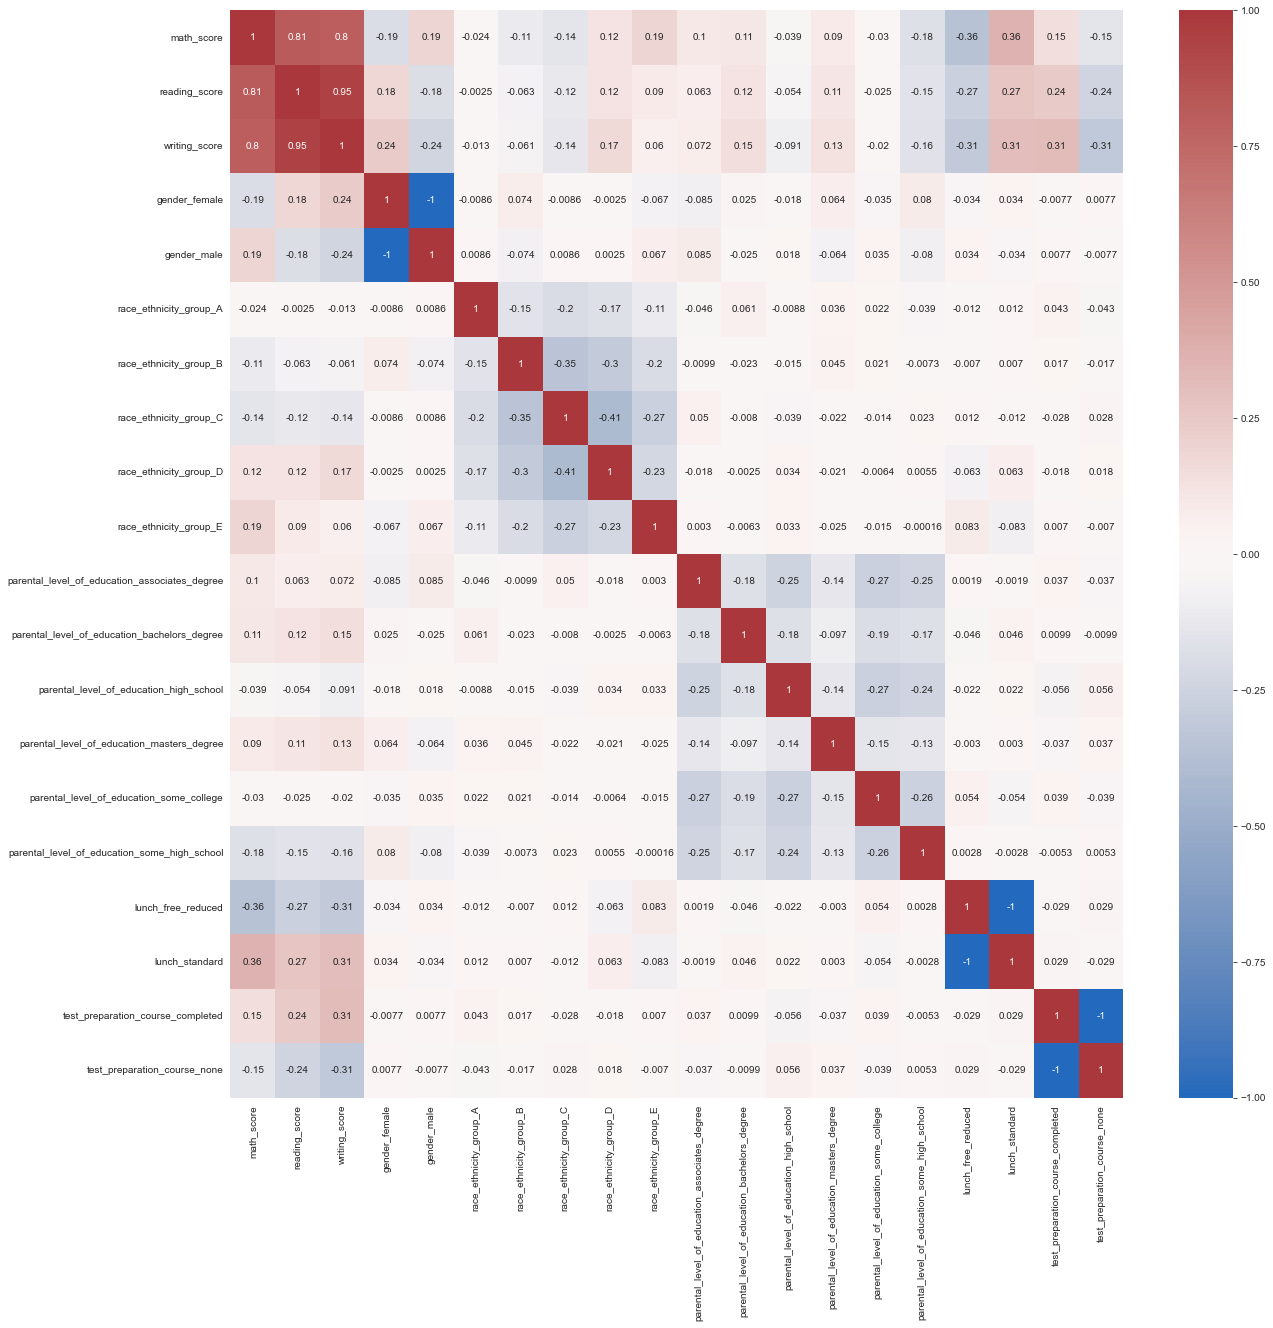

In [23]:
plt.figure(figsize = (20,20))
sns.color_palette("viridis", as_cmap=True)
Var_Corr = df2.corr(method='spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="vlag", center=0);

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math_score                                     1000 non-null   int64
 1   reading_score                                  1000 non-null   int64
 2   writing_score                                  1000 non-null   int64
 3   gender_female                                  1000 non-null   uint8
 4   gender_male                                    1000 non-null   uint8
 5   race_ethnicity_group_A                         1000 non-null   uint8
 6   race_ethnicity_group_B                         1000 non-null   uint8
 7   race_ethnicity_group_C                         1000 non-null   uint8
 8   race_ethnicity_group_D                         1000 non-null   uint8
 9   race_ethnicity_group_E                         1000 non-null   uint8
 10  p

##### Independing explanatory variables

In [25]:
categorical_columns_wo_correlated = df2.select_dtypes(include=['uint8']).columns.tolist()
categorical_columns_wo_correlated

['gender_female',
 'gender_male',
 'race_ethnicity_group_A',
 'race_ethnicity_group_B',
 'race_ethnicity_group_C',
 'race_ethnicity_group_D',
 'race_ethnicity_group_E',
 'parental_level_of_education_associates_degree',
 'parental_level_of_education_bachelors_degree',
 'parental_level_of_education_high_school',
 'parental_level_of_education_masters_degree',
 'parental_level_of_education_some_college',
 'parental_level_of_education_some_high_school',
 'lunch_free_reduced',
 'lunch_standard',
 'test_preparation_course_completed',
 'test_preparation_course_none']

In [26]:
categorical_columns_wo_correlated = [
'gender_female',
 #'gender_male',
 #'race_ethnicity_group_A',
 'race_ethnicity_group_B',
 'race_ethnicity_group_C',
 'race_ethnicity_group_D',
 'race_ethnicity_group_E',
 'parental_level_of_education_associates_degree',
 'parental_level_of_education_bachelors_degree',
 'parental_level_of_education_high_school',
 'parental_level_of_education_masters_degree',
 #'parental_level_of_education_some_college',
 'parental_level_of_education_some_high_school',
 'lunch_free_reduced',
 #'lunch_standard',
 'test_preparation_course_completed'
 #'test_preparation_course_none'
 ]
categorical_columns_wo_correlated

['gender_female',
 'race_ethnicity_group_B',
 'race_ethnicity_group_C',
 'race_ethnicity_group_D',
 'race_ethnicity_group_E',
 'parental_level_of_education_associates_degree',
 'parental_level_of_education_bachelors_degree',
 'parental_level_of_education_high_school',
 'parental_level_of_education_masters_degree',
 'parental_level_of_education_some_high_school',
 'lunch_free_reduced',
 'test_preparation_course_completed']

---

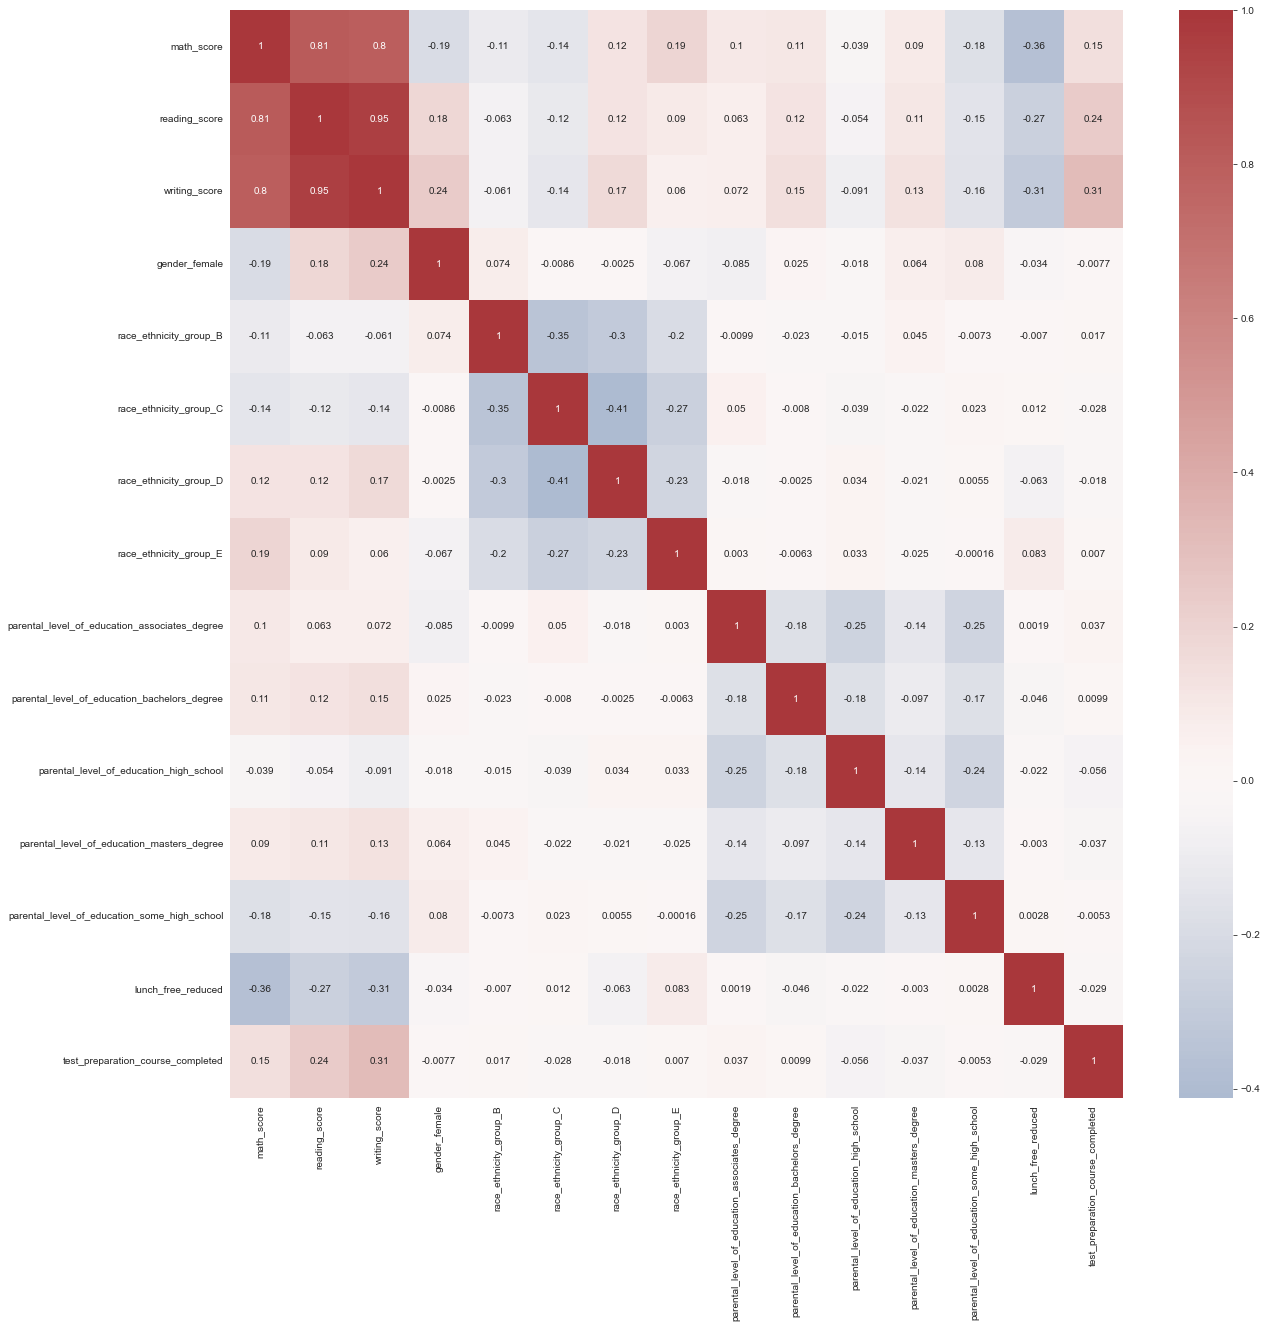

In [27]:
plt.figure(figsize = (20,20))
sns.color_palette("viridis", as_cmap=True)
Var_Corr = df2[numerical_columns + categorical_columns_wo_correlated].corr(method='spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="vlag", center=0);

### Podział danych

In [28]:
X  = df2[categorical_columns_wo_correlated]
y_math = df2['math_score']
y_reading = df2['reading_score']
y_writing = df2['writing_score']

In [29]:
X.head(5)

,gender_female,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E,parental_level_of_education_associates_degree,parental_level_of_education_bachelors_degree,parental_level_of_education_high_school,parental_level_of_education_masters_degree,parental_level_of_education_some_high_school,lunch_free_reduced,test_preparation_course_completed
0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,1


In [30]:
y_math.head(5), y_reading.head(5), y_writing.head(5)

(0    67
 1    40
 2    59
 3    77
 4    78
 Name: math_score, dtype: int64,
 0    67
 1    59
 2    60
 3    78
 4    73
 Name: reading_score, dtype: int64,
 0    63
 1    55
 2    50
 3    68
 4    68
 Name: writing_score, dtype: int64)

In [31]:
X_train, X_test, y_math_train, y_math_test, y_reading_train, y_reading_test, y_writing_train, y_writing_test = train_test_split(
    X, y_math, y_reading, y_writing, test_size = 0.2, random_state = 1)

X_train, X_val, y_math_train, y_math_val, y_reading_train, y_reading_val, y_writing_train, y_writing_val = train_test_split(
    X_train, y_math_train, y_reading_train, y_writing_train, test_size = 0.2, random_state = 1)

In [32]:
X_train.head(5).index

Int64Index([908, 989, 382, 122, 136], dtype='int64')

In [33]:
y_math_train.head(5).index

Int64Index([908, 989, 382, 122, 136], dtype='int64')

In [34]:
y_reading_train.head(5).index

Int64Index([908, 989, 382, 122, 136], dtype='int64')

In [35]:
y_writing_train.head(5).index

Int64Index([908, 989, 382, 122, 136], dtype='int64')

In [36]:
X_val.head(5).index

Int64Index([340, 500, 118, 792, 635], dtype='int64')

In [37]:
y_math_val.head(5).index

Int64Index([340, 500, 118, 792, 635], dtype='int64')

In [38]:
y_reading_val.head(5).index


Int64Index([340, 500, 118, 792, 635], dtype='int64')

In [39]:
y_writing_val.head(5).index

Int64Index([340, 500, 118, 792, 635], dtype='int64')

In [40]:
X_test.head(5).index

Int64Index([507, 818, 452, 368, 242], dtype='int64')

In [41]:
y_math_test.head(5).index

Int64Index([507, 818, 452, 368, 242], dtype='int64')

In [42]:
y_reading_test.head(5).index

Int64Index([507, 818, 452, 368, 242], dtype='int64')

In [43]:
y_writing_test.head(5).index

Int64Index([507, 818, 452, 368, 242], dtype='int64')

In [44]:
(X_train.shape, X_val.shape, X_test.shape, y_math_train.shape,  y_math_val.shape, y_math_test.shape,
 y_reading_train.shape, y_reading_val.shape, y_reading_test.shape, y_writing_train.shape, y_writing_val.shape, y_writing_test.shape)

((640, 12),
 (160, 12),
 (200, 12),
 (640,),
 (160,),
 (200,),
 (640,),
 (160,),
 (200,),
 (640,),
 (160,),
 (200,))

### Models

In [45]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=4)
forest_model = RandomForestRegressor(max_depth=4)
xgboost_model = xgb.XGBRegressor(max_depth=4)
svm_model = SVR()
knn_model = KNeighborsRegressor()


In [46]:
model_list = [linear_model, tree_model, forest_model, xgboost_model, svm_model, knn_model]

In [47]:
def run_regression_model(model, X_train, y_train, X_test, y_test):
    model_name = type(model).__name__

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    mse_test = mean_squared_error(y_test,y_pred)
    r2_test = r2_score(y_test,y_pred)
    mse_train = mean_squared_error(y_train,y_train_pred)
    r2_train = r2_score(y_train,y_train_pred)
    return {'model_name': model_name,
            'predictions': y_pred,
            'mse_train': mse_train,
            'r2_train': r2_train,
            'mse_test': mse_test,
            'r2_test': r2_test
            }

##### math_score

In [48]:
#Results for validation set
results_list = []
for model in model_list:
    results = run_regression_model(model, X_train, y_math_train, X_val, y_math_val)
    results_list.append(results)

In [49]:
for model_results in results_list:
    print(model_results['model_name'], '\t'
     'MSE train:', '{:.3f}'.format(model_results['mse_train']), 'MSE test:', '{:.3f}'.format(model_results['mse_test']), '\t'
     'R2 train:', '{:.3f}'.format(model_results['r2_train']), 'R2 test:', '{:.3f}'.format(model_results['r2_test']))

LinearRegression 	MSE train: 162.673 MSE test: 138.230 	R2 train: 0.336 R2 test: 0.245
DecisionTreeRegressor 	MSE train: 161.159 MSE test: 177.922 	R2 train: 0.342 R2 test: 0.028
RandomForestRegressor 	MSE train: 152.825 MSE test: 154.330 	R2 train: 0.376 R2 test: 0.157
XGBRegressor 	MSE train: 123.570 MSE test: 176.971 	R2 train: 0.496 R2 test: 0.033
SVR 	MSE train: 169.831 MSE test: 139.099 	R2 train: 0.307 R2 test: 0.240
KNeighborsRegressor 	MSE train: 138.537 MSE test: 163.091 	R2 train: 0.434 R2 test: 0.109


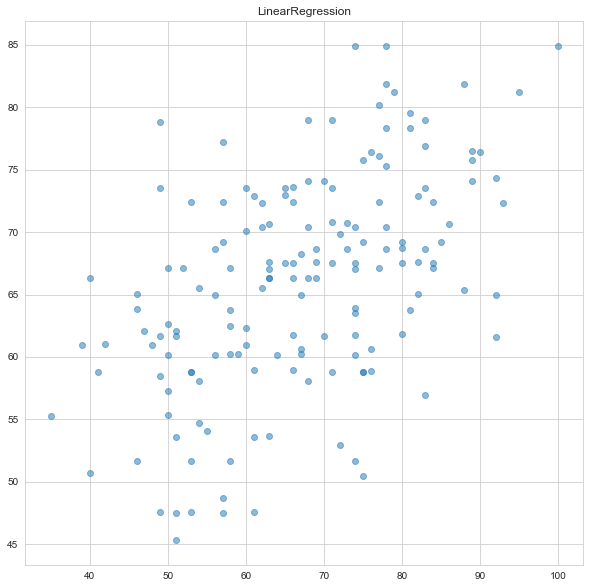

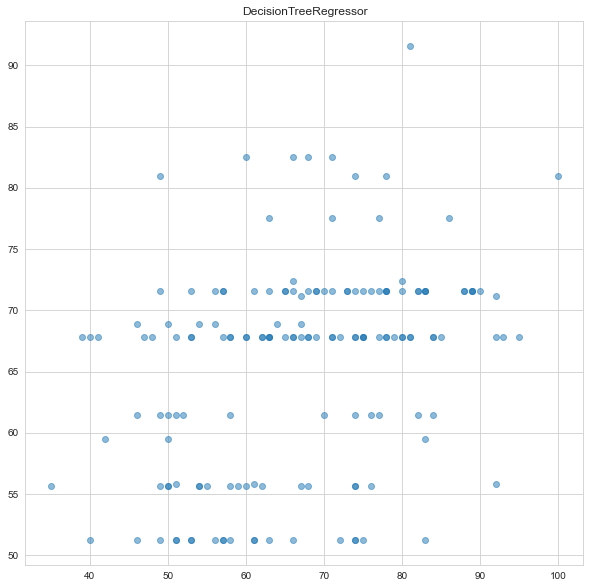

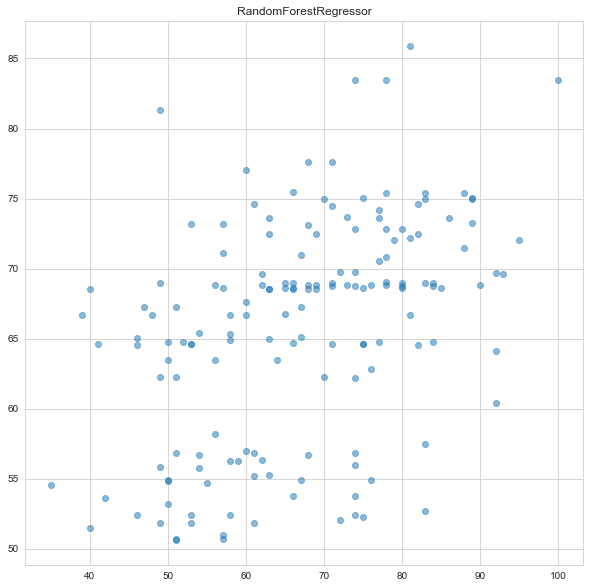

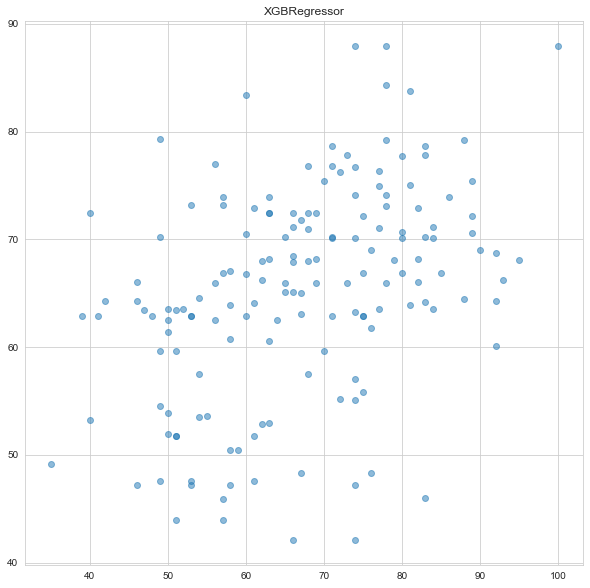

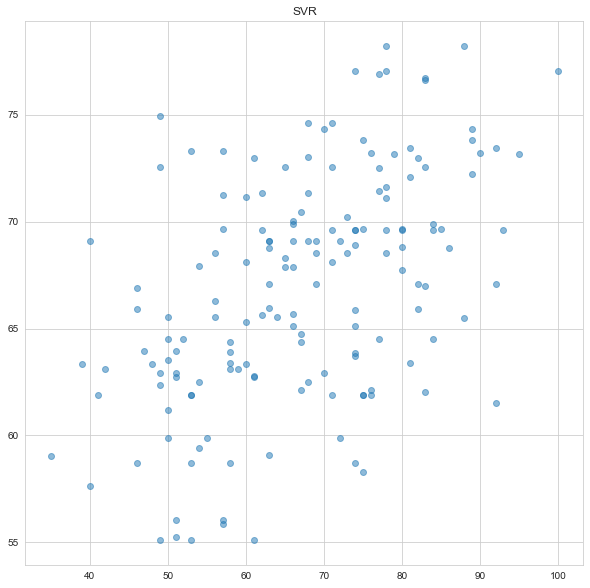

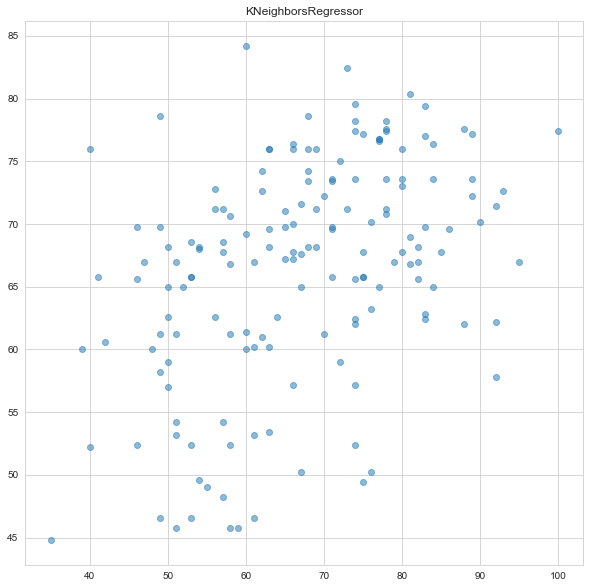

In [50]:
for model in results_list:
    plt.figure(figsize = (10,10))
    plt.title(model['model_name'])
    plt.scatter(y_math_val, model['predictions'], alpha=0.5)

**Conclusion:** linear regression and SVM are best models.

##### writing score

In [51]:
#Results for validation set
results_list = []
for model in model_list:
    results = run_regression_model(model, X_train, y_writing_train, X_val, y_writing_val)
    results_list.append(results)

In [52]:
for model_results in results_list:
    print(model_results['model_name'], '\t'
     'MSE train:', '{:.3f}'.format(model_results['mse_train']), 'MSE test:', '{:.3f}'.format(model_results['mse_test']), '\t'
     'R2 train:', '{:.3f}'.format(model_results['r2_train']), 'R2 test:', '{:.3f}'.format(model_results['r2_test']))

LinearRegression 	MSE train: 156.050 MSE test: 131.521 	R2 train: 0.354 R2 test: 0.391
DecisionTreeRegressor 	MSE train: 162.905 MSE test: 158.179 	R2 train: 0.326 R2 test: 0.268
RandomForestRegressor 	MSE train: 154.088 MSE test: 149.245 	R2 train: 0.362 R2 test: 0.309
XGBRegressor 	MSE train: 120.686 MSE test: 170.122 	R2 train: 0.501 R2 test: 0.212
SVR 	MSE train: 165.975 MSE test: 145.555 	R2 train: 0.313 R2 test: 0.326
KNeighborsRegressor 	MSE train: 134.402 MSE test: 166.088 	R2 train: 0.444 R2 test: 0.231


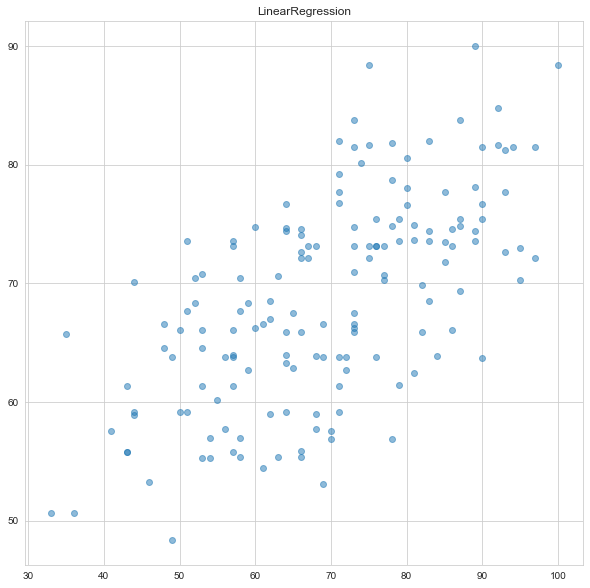

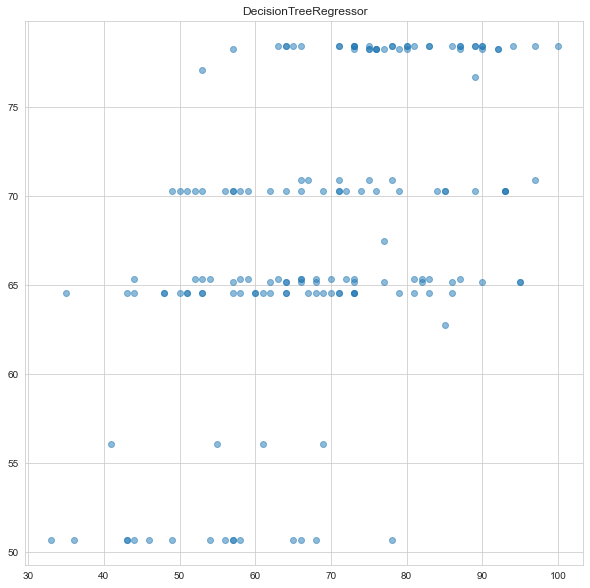

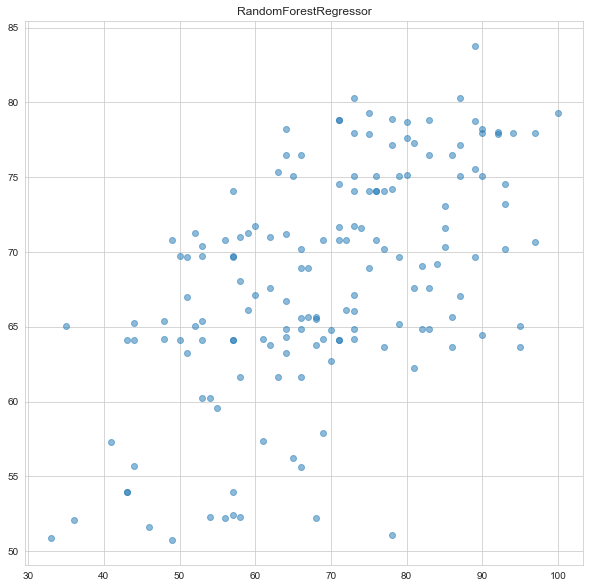

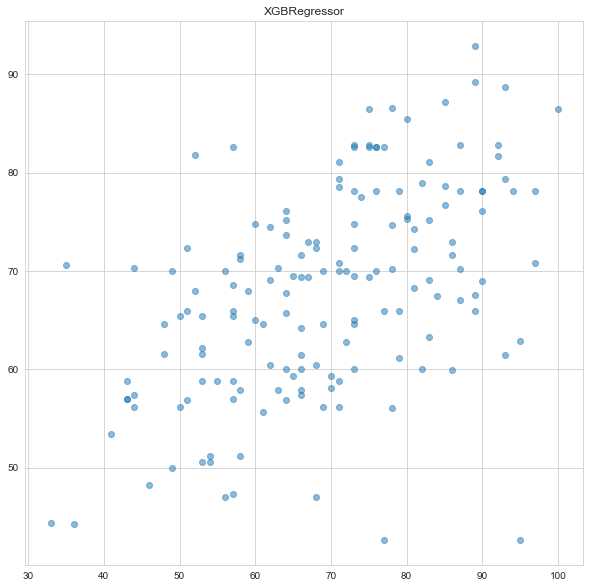

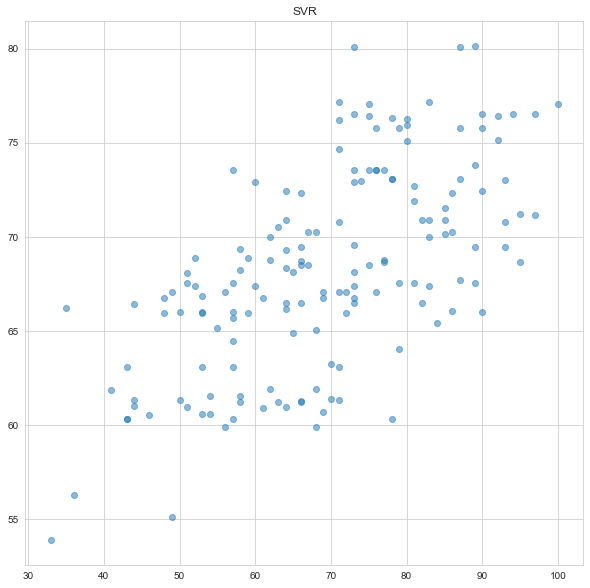

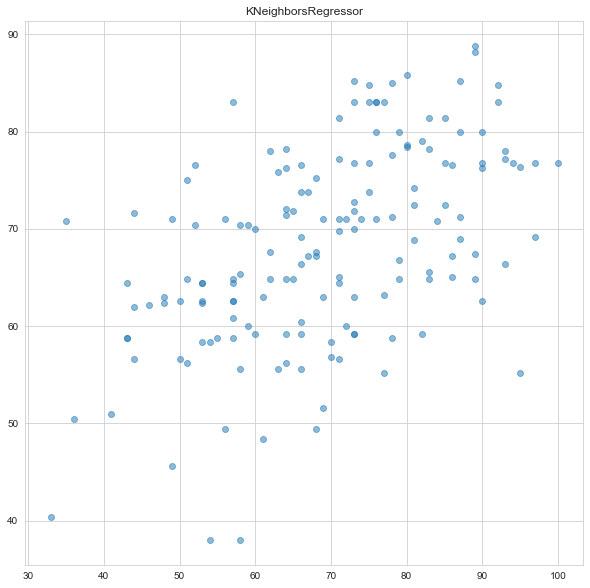

In [53]:
for model in results_list:
    plt.figure(figsize = (10,10))
    plt.title(model['model_name'])
    plt.scatter(y_writing_val, model['predictions'], alpha=0.5)

**Conclusion:** linear regression and SVM are best again.

##### reading score

In [54]:
#Results for validation set
results_list = []
for model in model_list:
    results = run_regression_model(model, X_train, y_reading_train, X_val, y_reading_val)
    results_list.append(results)

In [55]:
for model_results in results_list:
    print(model_results['model_name'], '\t'
     'MSE train:', '{:.3f}'.format(model_results['mse_train']), 'MSE test:', '{:.3f}'.format(model_results['mse_test']), '\t'
     'R2 train:', '{:.3f}'.format(model_results['r2_train']), 'R2 test:', '{:.3f}'.format(model_results['r2_test']))

LinearRegression 	MSE train: 165.797 MSE test: 132.537 	R2 train: 0.247 R2 test: 0.251
DecisionTreeRegressor 	MSE train: 167.768 MSE test: 145.091 	R2 train: 0.238 R2 test: 0.180
RandomForestRegressor 	MSE train: 159.463 MSE test: 141.492 	R2 train: 0.276 R2 test: 0.200
XGBRegressor 	MSE train: 131.088 MSE test: 175.279 	R2 train: 0.405 R2 test: 0.009
SVR 	MSE train: 171.398 MSE test: 139.318 	R2 train: 0.222 R2 test: 0.212
KNeighborsRegressor 	MSE train: 141.876 MSE test: 171.488 	R2 train: 0.356 R2 test: 0.031


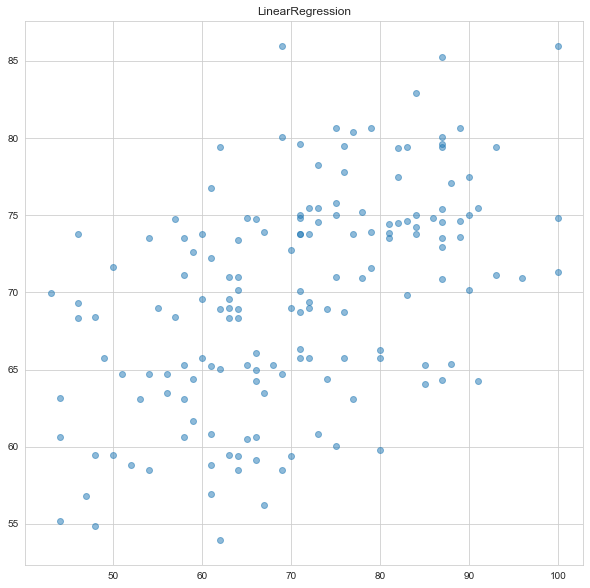

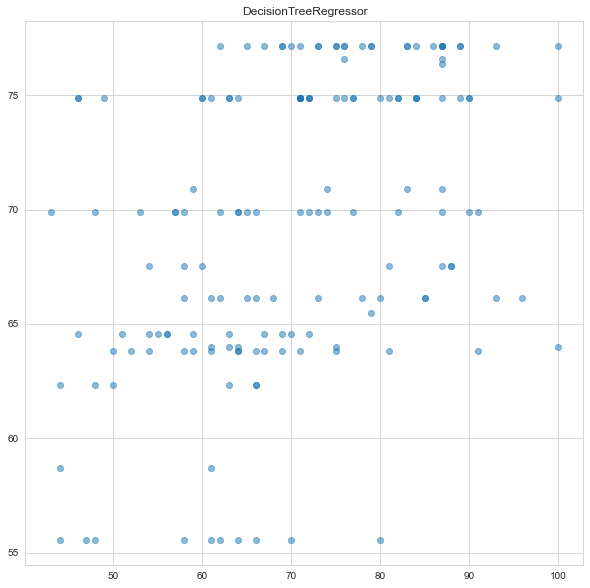

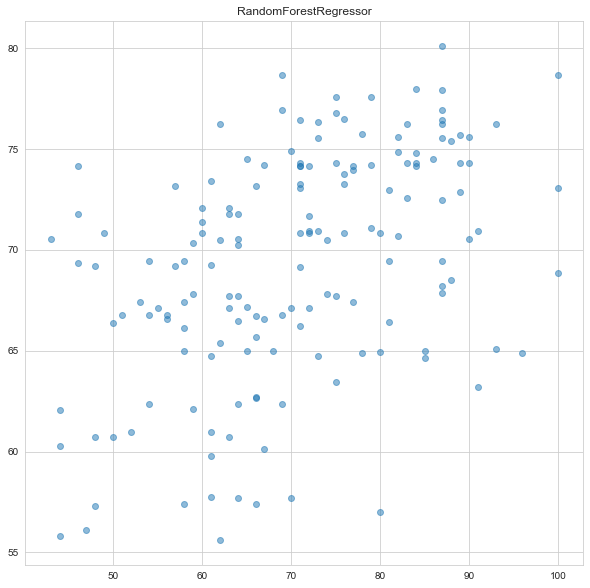

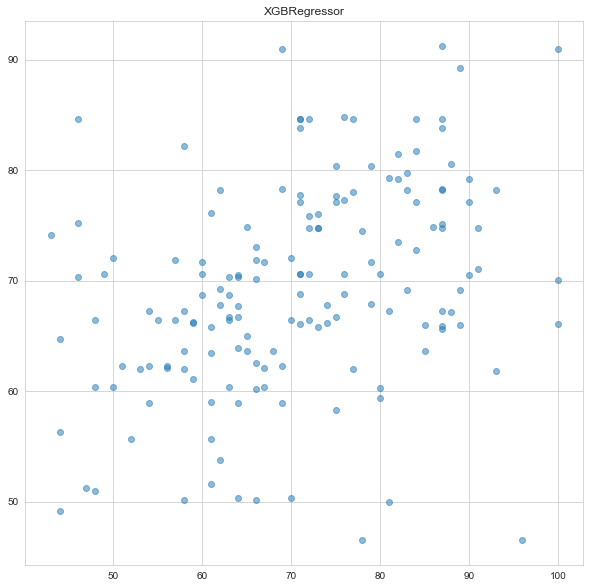

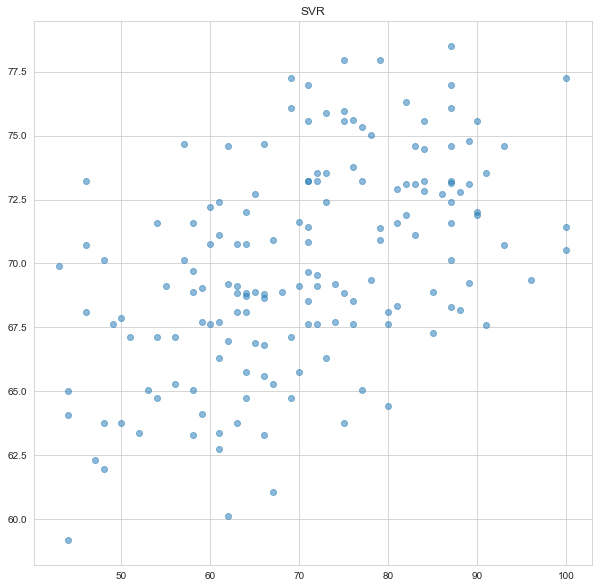

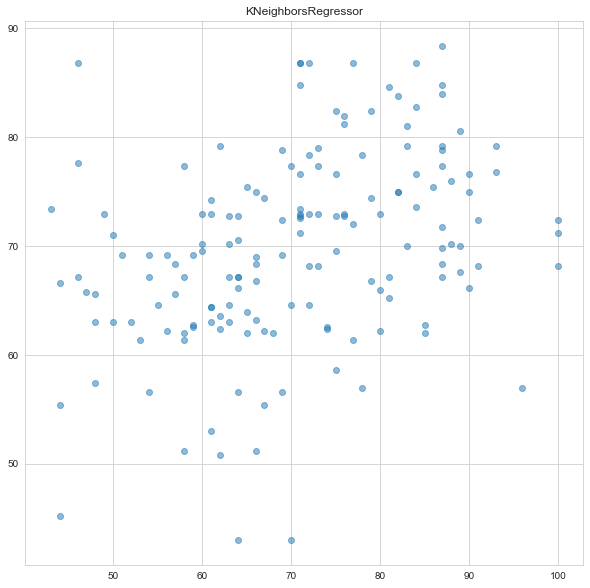

In [56]:
for model in results_list:
    plt.figure(figsize = (10,10))
    plt.title(model['model_name'])
    plt.scatter(y_reading_val, model['predictions'], alpha=0.5)

**Conclusion:** linear reagression and SVM are best again.

### Selected models:
- Linear regerssion
- SVM

### Hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
def grid_search_results (model, X_train, y_train, X_test, param_grid, scorer, refit, return_train_score:bool = True):
    # grid search
    grid_search = GridSearchCV(model, param_grid=param_grid, scoring = scorer, refit = refit, return_train_score=return_train_score, verbose=0)
    grid_search.fit(X_train, y_train)
    best_est = grid_search.best_estimator_
    res = grid_search.cv_results_
    best_est, res
    # # Gathering scores for best classifier
    slownik_score = {}

    #Best classifier on test set according to metric we have decided on
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search.cv_results_[scorer_rank].argmin()

    #Gathering all scorers for scorer_prefixes sets
    for sc in scorer:
        for sc_prefix in scorer_prefixes:
        
            scorer_name = sc_prefix + sc
            if 'neg' in sc:
                scorer_value = - grid_search.cv_results_[scorer_name][rank_min]
            else:
                scorer_value = grid_search.cv_results_[scorer_name][rank_min]
            
            slownik_score[sc_prefix  + sc] = scorer_value
    
    #adding best parameter combination to a dictionary
    slownik_score['best_params'] = grid_search.best_params_

    #prediction for best estimator on train set
    y_train_pred = best_est.predict(X_train)
    #y_pred_proba = best_est.predict_proba(X_train)[:,1]

    #adding train prediction to a dictionary
    slownik_score['y_train_pred'] = y_train_pred
    
    y_pred = best_est.predict(X_test)
    #y_pred_proba_test = best_est.predict_proba(X_test)[:,1]
    
    #adding prediction to a dictionary
    slownik_score['y_pred'] = y_pred
    
    return slownik_score



In [59]:
param_svm = {"C": [0.1, 0.5, 1, 1.5],
                'kernel': ['rbf','poly'],
                'gamma': ['auto','scale'],
                'degree': [2, 3, 4]
            }


In [60]:
rank = ['rank_train_', 'rank_test_']
scorer_prefixes = ['mean_train_','mean_test_']

scorer = ['neg_mean_squared_error', 'r2']
refit = 'neg_mean_squared_error'

y_train = y_math_train



In [61]:
svm_results = grid_search_results(svm_model, X_train, y_train, X_val,
 param_grid=param_svm, scorer = scorer, refit = refit, return_train_score=True)


In [62]:
svm_results.keys()

dict_keys(['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error', 'mean_train_r2', 'mean_test_r2', 'best_params', 'y_train_pred', 'y_pred'])

In [63]:
print(svm_results['mean_train_neg_mean_squared_error'], svm_results['mean_test_neg_mean_squared_error'], '\n',
svm_results['mean_train_r2'], svm_results['mean_test_r2'], '\n',
svm_results['best_params'])

162.94218095456736 178.21411715956737 
 0.3344405198364534 0.2683127661149701 
 {'C': 1.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


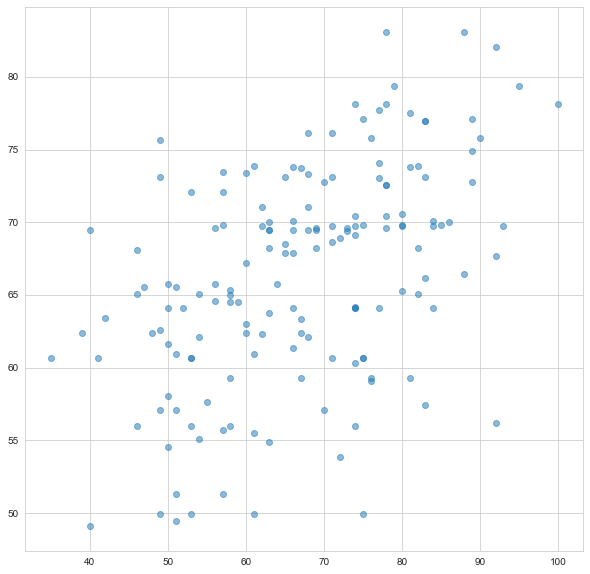

In [64]:
plt.figure(figsize = (10,10))
plt.scatter(y_math_val, svm_results['y_pred'], alpha=0.5)

Mamy punkt zaczepny dla doboru parametrów. Kontynuuje dostrajanie hiperparametrów ręcznie

In [65]:
#repeating code to be sure be work on a correct data
X  = df2[categorical_columns_wo_correlated]
y_math = df2['math_score']
y_reading = df2['reading_score']
y_writing = df2['writing_score']

In [66]:
X_train, X_test, y_math_train, y_math_test, y_reading_train, y_reading_test, y_writing_train, y_writing_test = train_test_split(
    X, y_math, y_reading, y_writing, test_size = 0.2, random_state = 1)

X_train, X_val, y_math_train, y_math_val, y_reading_train, y_reading_val, y_writing_train, y_writing_val = train_test_split(
    X_train, y_math_train, y_reading_train, y_writing_train, test_size = 0.2, random_state = 1)

In [67]:
# {'C': 1.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [68]:
SVM_results = []

In [69]:
kern = 'poly'
d = 2
g = 'scale'
c = 1

svm_model = SVR(kernel= kern, degree= d, gamma = g, C = c)

model_list = [svm_model]

#Validating set results
# results_list = []
for model in model_list:
    results = run_regression_model(model, X_train, y_math_train, X_val, y_math_val)
    results['hiperparameters'] = f'kernel: {kern}, degree: {d}, gamma: {g}, C: {c}'
    # results_list.append(results)
    SVM_results.append(results)

In [70]:
for res in SVM_results:
    print('hiperparameters:', res['hiperparameters'],'\n',
    'mse_train:', res['mse_train'], 'mse_test', res['mse_test'], '\n',
    'r2_train:', res['r2_train'],'r2_test', res['r2_test'], '\n')

hiperparameters: kernel: poly, degree: 2, gamma: scale, C: 1 
 mse_train: 166.60541983111904 mse_test 141.84355639850315 
 r2_train: 0.31983123311676265 r2_test 0.2251815809668044 



Final choice: kernel: poly, degree: 2, gamma: scale, C: 1 

### Test for math_score

In [71]:
# svm_model = SVR(kernel= kern, degree= d, gamma = g, C = c)
# linear_model

mse: 187.93566515627205 	 r2: 0.25999026768179034


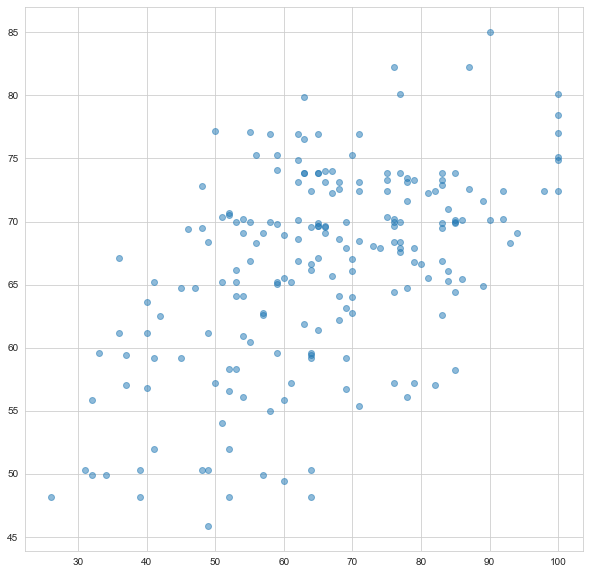

In [72]:
y_pred_test = svm_model.predict(X_test)
mse_test = mean_squared_error(y_math_test,y_pred_test)
r2_test = r2_score(y_math_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_math_test, y_pred_test, alpha=0.5)


mse: 218.4815085538017 	 r2: 0.13971388811730467


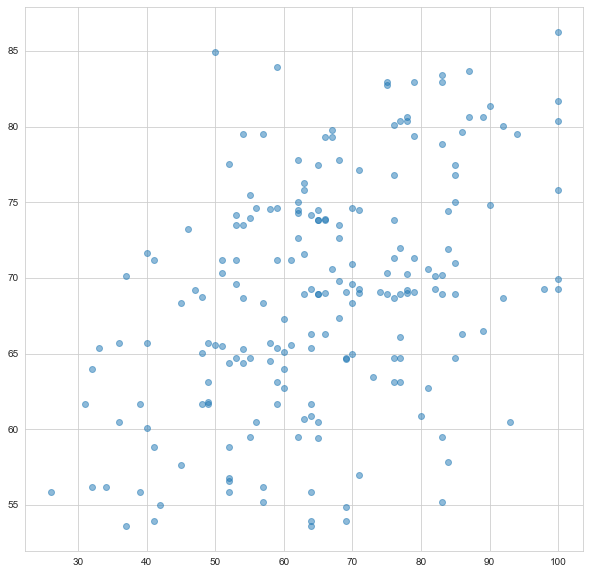

In [73]:
y_pred_test = linear_model.predict(X_test)
mse_test = mean_squared_error(y_math_test,y_pred_test)
r2_test = r2_score(y_math_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_math_test, y_pred_test, alpha=0.5)

### Test for reading_score

mse: 242.66688495815418 	 r2: -0.03014218054083373


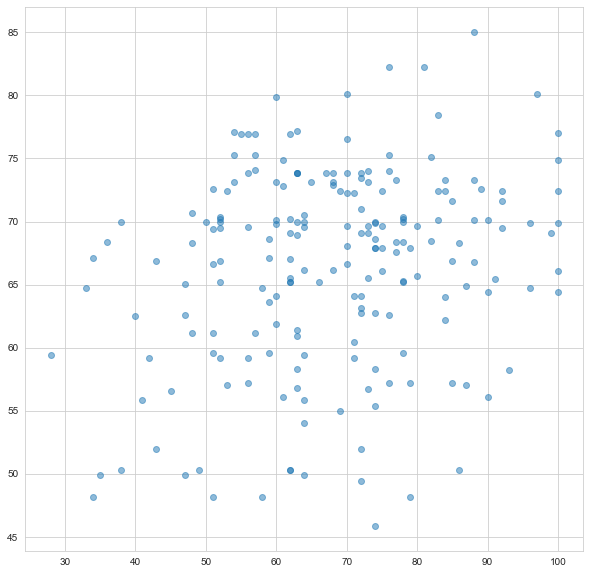

In [74]:
y_pred_test = svm_model.predict(X_test)
mse_test = mean_squared_error(y_reading_test,y_pred_test)
r2_test = r2_score(y_reading_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_reading_test, y_pred_test, alpha=0.5)


mse: 174.48147416306244 	 r2: 0.25931086027946904


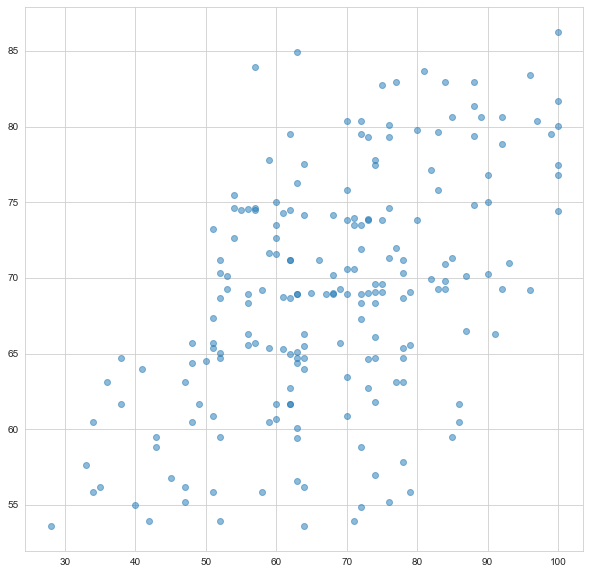

In [75]:
y_pred_test = linear_model.predict(X_test)
mse_test = mean_squared_error(y_reading_test,y_pred_test)
r2_test = r2_score(y_reading_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_reading_test, y_pred_test, alpha=0.5)

### Test for writing_score

mse: 260.0454866624478 	 r2: 0.025030268780452114


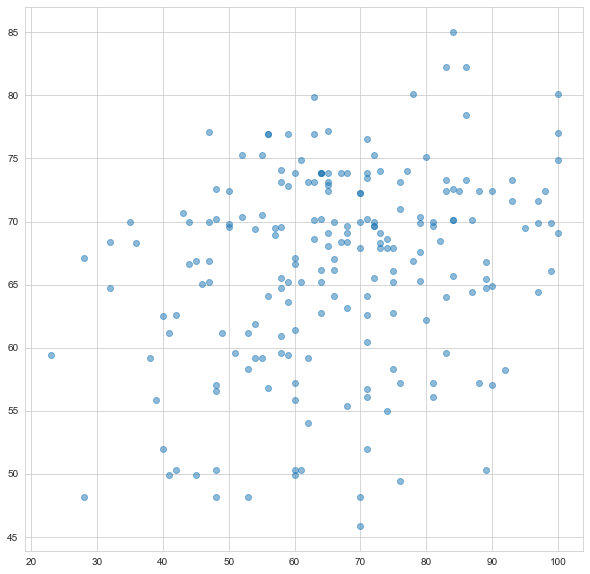

In [76]:
y_pred_test = svm_model.predict(X_test)
mse_test = mean_squared_error(y_writing_test,y_pred_test)
r2_test = r2_score(y_writing_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_writing_test, y_pred_test, alpha=0.5)


mse: 182.94113192087872 	 r2: 0.3141120482147727


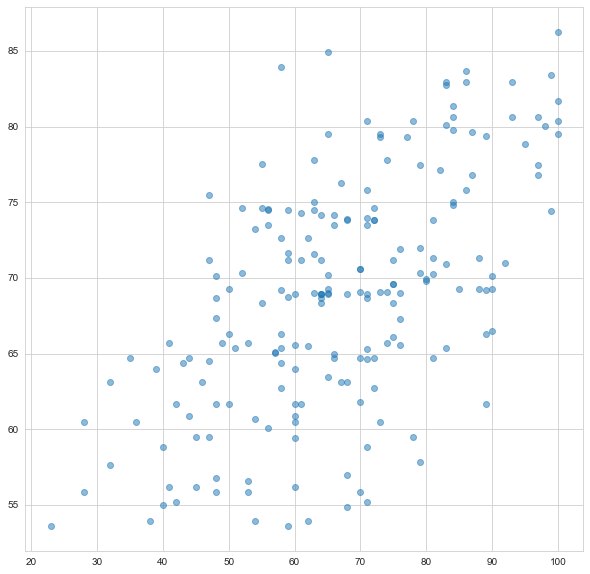

In [77]:
y_pred_test = linear_model.predict(X_test)
mse_test = mean_squared_error(y_writing_test,y_pred_test)
r2_test = r2_score(y_writing_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_writing_test, y_pred_test, alpha=0.5)

**Conclusion**: for math score SVM is better, for reading and writing score linear regressor is better.

Checking whether another set of parameters in SVM would be better for writing score

In [78]:
rank = ['rank_train_', 'rank_test_']
scorer_prefixes = ['mean_train_','mean_test_']

scorer = ['neg_mean_squared_error', 'r2']
refit = 'neg_mean_squared_error'

y_train = y_writing_train



In [79]:
svm_results = grid_search_results(svm_model, X_train, y_train, X_val,
 param_grid=param_svm, scorer = scorer, refit = refit, return_train_score=True)


In [80]:
svm_results.keys()

dict_keys(['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error', 'mean_train_r2', 'mean_test_r2', 'best_params', 'y_train_pred', 'y_pred'])

In [81]:
print(svm_results['mean_train_neg_mean_squared_error'], svm_results['mean_test_neg_mean_squared_error'], '\n',
svm_results['mean_train_r2'], svm_results['mean_test_r2'], '\n',
svm_results['best_params'])

156.90498452111862 172.95925552685617 
 0.35076590038177546 0.2833005081181611 
 {'C': 1.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


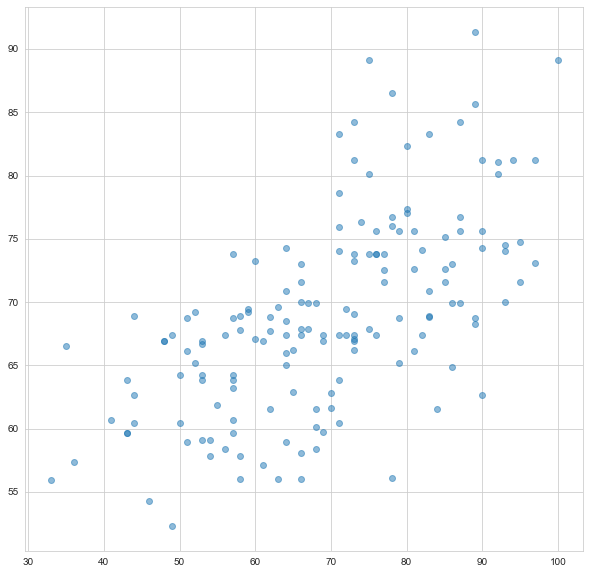

In [82]:
plt.figure(figsize = (10,10))
plt.scatter(y_writing_val, svm_results['y_pred'], alpha=0.5)

GridSearch returned the exact set of parameters. We won't be tuning them. We check feature importance for 2 final models.

### Feature importance

Feature: 0 gender_female, Score: 20.889551647818575]
Feature: 1 race_ethnicity_group_B, Score: 6.8804325309038346]
Feature: 2 race_ethnicity_group_C, Score: 11.280262150300512]
Feature: 3 race_ethnicity_group_D, Score: 2.148070903571198]
Feature: 4 race_ethnicity_group_E, Score: 7.342179446527683]
Feature: 5 parental_level_of_education_associates_degree, Score: 4.278548457407709]
Feature: 6 parental_level_of_education_bachelors_degree, Score: 2.749411904813081]
Feature: 7 parental_level_of_education_high_school, Score: 2.5355004926201388]
Feature: 8 parental_level_of_education_masters_degree, Score: 3.8390625998373364]
Feature: 9 parental_level_of_education_some_high_school, Score: 8.102653875273784]
Feature: 10 lunch_free_reduced, Score: 59.80101550812166]
Feature: 11 test_preparation_course_completed, Score: 7.557099990072311]


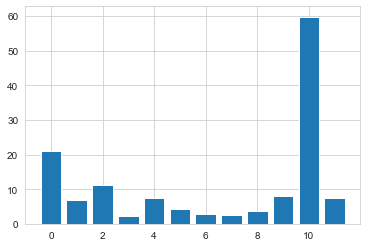

In [83]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# perform permutation importance
perm_results = permutation_importance(svm_model, X_train, y_math_train, scoring='neg_mean_squared_error')
# get importance
importance = perm_results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i} {categorical_columns_wo_correlated[i]}, Score: {v}]' )
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0 gender_female, 4.868
Feature: 1 race_ethnicity_group_B, -4.024
Feature: 2 race_ethnicity_group_C, -3.666
Feature: 3 race_ethnicity_group_D, 1.796
Feature: 4 race_ethnicity_group_E, 2.827
Feature: 5 parental_level_of_education_associates_degree, 4.292
Feature: 6 parental_level_of_education_bachelors_degree, 4.574
Feature: 7 parental_level_of_education_high_school, -1.249
Feature: 8 parental_level_of_education_masters_degree, 7.891
Feature: 9 parental_level_of_education_some_high_school, -3.86
Feature: 10 lunch_free_reduced, -9.514
Feature: 11 test_preparation_course_completed, 5.608


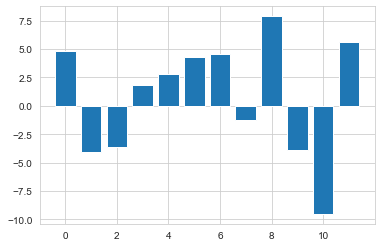

In [84]:
for i, column in enumerate(categorical_columns_wo_correlated):
    print(f'Feature: {i} {column}, {np.round(linear_model.coef_[i],3)}')
pyplot.bar([x for x in range(len(categorical_columns_wo_correlated))], [np.round(linear_model.coef_[i],3) for i in range(len(categorical_columns_wo_correlated))])
pyplot.show()

Both models point out to lunch_free_reduced as the most important variable.
For SVM next the most important variable is gender_female, for linear regression is parental_level_of_education_masters_degree.

<BarContainer object of 12 artists>

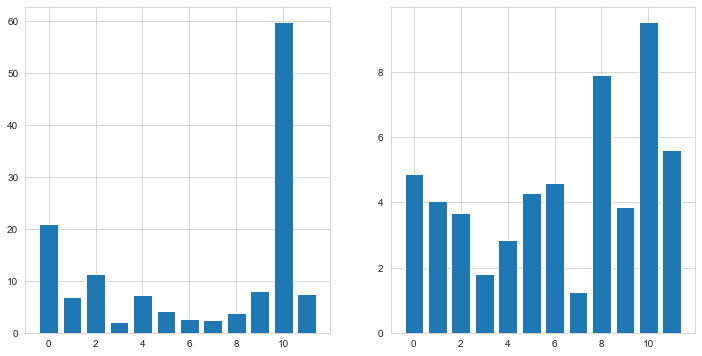

In [85]:

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
pyplot.bar([x for x in range(len(importance))], importance)


plt.subplot(1, 2, 2)
pyplot.bar([x for x in range(len(categorical_columns_wo_correlated))], [np.round(abs(linear_model.coef_[i]),3) for i in range(len(categorical_columns_wo_correlated))])


The biggest difference is for variable no. 8 and 11 (parental_level_of_education_masters_degree and test_preparation_course_completed respectively).
From a logical point of view whether one atend a preparation course should have more impact on test results.

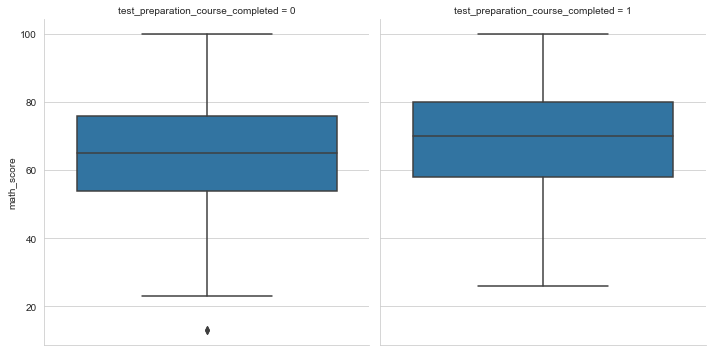

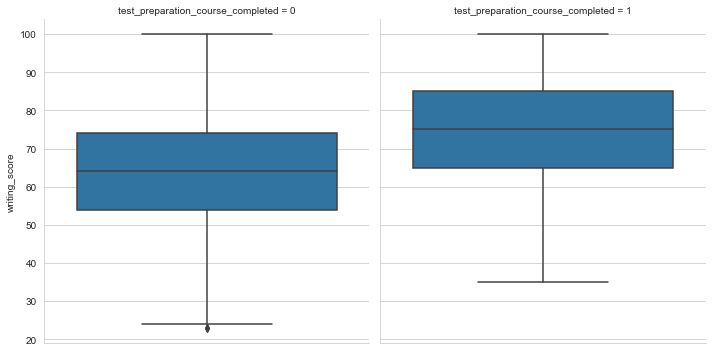

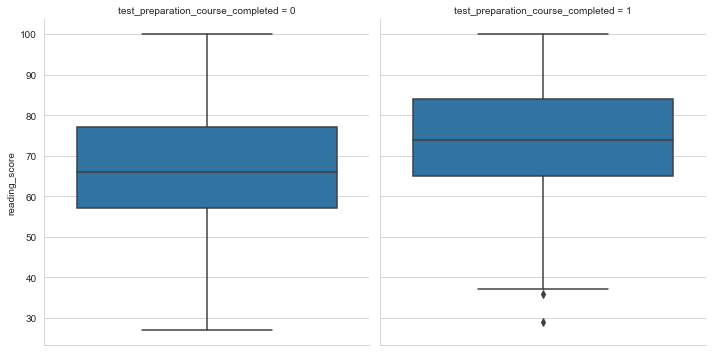

In [86]:
# ['test_preparation_course_completed']
# ['math_score', 'writing_score', 'reading_score']


for num_col in ['math_score', 'writing_score', 'reading_score']:
    for cat_col in ['test_preparation_course_completed']:
        sns.catplot(data=df2, y=num_col, col = cat_col, kind='box',height=5);


In [87]:
df2.groupby(['test_preparation_course_completed'])[['math_score', 'writing_score', 'reading_score']].agg(['mean','median'])

math_score        writing_score         \
                                        mean median          mean median   
test_preparation_course_completed                                          
0                                  64.738346   65.0     64.245113   64.0   
1                                  69.686567   70.0     74.671642   75.0   

                                  reading_score         
                                           mean median  
test_preparation_course_completed                       
0                                     66.439098   66.0  
1                                     74.089552   74.0

In case of math score attending a preparation course had less impact according to writing and reading score.

In [88]:
df2.groupby(['parental_level_of_education_masters_degree'])[['math_score', 'writing_score', 'reading_score']].agg(['mean','median'])

math_score        writing_score  \
                                                 mean median          mean   
parental_level_of_education_masters_degree                                   
0                                           66.005376   66.0     67.124731   
1                                           71.585714   71.0     75.885714   

                                                  reading_score         
                                           median          mean median  
parental_level_of_education_masters_degree                              
0                                            67.5     68.518280   69.5  
1                                            77.0     75.428571   76.5

Similarly parental_level_of_education_masters_degree.

In [89]:
df2.groupby(['lunch_free_reduced'])[['math_score', 'writing_score', 'reading_score']].agg(['mean','median'])


math_score        writing_score        reading_score       
                         mean median          mean median          mean median
lunch_free_reduced                                                            
0                   70.607362   71.0     71.374233   71.0     72.104294   72.0
1                   58.505747   58.0     60.925287   61.0     63.189655   64.0

In case of math score lunch_free_reduced had bigger impact on test result and was also important for other types of tests.